## **Fixed Income Portfolo Anlaysis**

*Python packages and raw data downloads*

In [303]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import ace_tools as tools

# Loading each excel tab as a separate dataframe
file_path = "C:/Users/rfinlayson/Case study/FI Risk Analyst Case Study.xlsx"
df_mar24 = pd.read_excel(file_path, sheet_name="FI Data (31 March 2024)", engine="openpyxl")
df_jun24 = pd.read_excel(file_path, sheet_name="FI Data (30 June 2024)", engine="openpyxl")
df_rm = pd.read_excel(file_path, sheet_name="Risk Metrics (Time Series)", engine="openpyxl")

# Display first few rows of each sheet to confirm upload
display(df_mar24.head(), df_jun24.head(), df_rm.head())

,Asset ID,Asset Name,Holdings,Weight (%),Bmk Weight (%),Active Weight (%),Active Total Risk,MC to Active Total Risk,%CR to Active Total Risk,Dirty Price,Price,Active Effective Duration (MAC),Active Spread Duration
0,ZAG000172511,1041483 THE THEKWINI FUND 16 RF LIM 08/54 5.76,157000.000000,0.001370,0.000000,0.001370,24.590795,0.158779,0.029379,100.335371,99.7357,10.188455,7.360801
1,ZAG000077686,NQABA FINANCE 1 (PTY) LTD NQABA 1 A10,26809.270304,0.000286,0.000000,0.000286,9.716396,0.117051,0.004518,122.578295,121.5205,4.883448,3.710266
2,ZAG000164369,990512 THE STANDARD BANK OF SOUTH AFR 07/34 FI...,418000.000000,0.002761,0.000000,0.002761,4.616738,0.098436,0.036694,75.924748,74.4042,0.315294,0.398712
3,ZAG000077488,"SOUTH AFRICA, REPUBLIC OF (GOVERNMENT) 6.5% 20...",163984.281000,0.008229,0.021783,-0.013554,3.962073,0.090312,-0.165267,57.685155,57.1331,2.485058,2.080060
4,ZPK24,South Africa R214 May 24,-2427.000000,0.000000,0.000000,0.000000,11.570592,0.090312,-0.137191,87.283000,87.2830,2.485058,2.080060


,Asset ID,Asset Name,Holdings,Weight (%),Bmk Weight (%),Active Weight (%),Active Total Risk,MC to Active Total Risk,%CR to Active Total Risk,Dirty Price,Price,Active Effective Duration (MAC),Active Spread Duration
0,ASW240605,1304949 ABSA 8.185% 24 JUN 29 AGAINST JIBAR 3MO,162000000.0,-0.000012,0.0,-0.000012,6235.100028,35.575413,-0.040911,-0.000881,-0.000881,4257.275221,-5.647686
1,ASW240604,1304951 ABSA 7.86% 24 JUN 26 AGAINST JIBAR 3MO I,389500000.0,0.000009,0.0,0.000009,7784.222767,26.559058,0.024191,0.000290,0.000290,5339.422350,-5.647686
2,ASW240606,1305551 ABSA 7.895% 26 JUN 26 AGAINST JIBAR 3MO,383900000.0,-0.000031,0.0,-0.000031,2353.009850,8.007524,-0.023812,-0.000961,-0.000961,1605.976942,-5.647686
3,SSW240608,1306147 STANDARD BANK OF SA LIMITED 7.9% 27 JUN,196200000.0,-0.000018,0.0,-0.000018,2111.534794,7.171715,-0.012167,-0.001073,-0.001073,1437.830772,-5.647686
4,NSW240601,1306145 NEDBANK LTD. 7.91% 27 JUN 26 AGAINST JIB,194200000.0,-0.000020,0.0,-0.000020,1801.841560,6.122397,-0.012045,-0.001257,-0.001257,1226.612395,-5.647686


,PortfolioCode,ReferenceDate,BetaP,Tracking Error (Ex Ante),SpreadDuration (Active),CreditSpreadDur (Active)
0,FI Fund,2022-07-01,1.116464,1.103996,1.371668,1.081494
1,FI Fund,2022-07-04,1.117559,1.109644,1.374942,1.080624
2,FI Fund,2022-07-05,1.111632,1.036607,1.267023,1.081975
3,FI Fund,2022-07-06,1.115425,1.056894,1.271441,1.094448
4,FI Fund,2022-07-07,1.116105,1.063402,1.270453,1.088047


_clean data_

In [304]:
# Check for missing values (NaN or N/A) in the dataframe
missing_values_jun = df_jun24.isnull().sum()
missing_values_mar = df_mar24.isnull().sum()

# Display columns that had missing values
missing_values_summary_jun = missing_values_jun[missing_values_jun > 0]
missing_values_summary_mar = missing_values_mar[missing_values_mar > 0]

display(missing_values_summary_jun)
display(missing_values_summary_mar)

Dirty Price    2
dtype: int64

Dirty Price    2
dtype: int64

In [305]:
# Replace missing values with 1
df_jun24_filled = df_jun24.fillna(1)
df_mar24_filled = df_mar24.fillna(1)

# Display first few rows of each sheet to confirm upload
display(df_mar24_filled.head(30), df_jun24_filled.head(30))

,Asset ID,Asset Name,Holdings,Weight (%),Bmk Weight (%),Active Weight (%),Active Total Risk,MC to Active Total Risk,%CR to Active Total Risk,Dirty Price,Price,Active Effective Duration (MAC),Active Spread Duration
0,ZAG000172511,1041483 THE THEKWINI FUND 16 RF LIM 08/54 5.76,1.570000e+05,0.001370,0.000000,0.001370,24.590795,0.158779,0.029379,100.335371,99.735700,10.188455,7.360801
1,ZAG000077686,NQABA FINANCE 1 (PTY) LTD NQABA 1 A10,2.680927e+04,0.000286,0.000000,0.000286,9.716396,0.117051,0.004518,122.578295,121.520500,4.883448,3.710266
2,ZAG000164369,990512 THE STANDARD BANK OF SOUTH AFR 07/34 FI...,4.180000e+05,0.002761,0.000000,0.002761,4.616738,0.098436,0.036694,75.924748,74.404200,0.315294,0.398712
3,ZAG000077488,"SOUTH AFRICA, REPUBLIC OF (GOVERNMENT) 6.5% 20...",1.639843e+05,0.008229,0.021783,-0.013554,3.962073,0.090312,-0.165267,57.685155,57.133100,2.485058,2.080060
4,ZPK24,South Africa R214 May 24,-2.427000e+03,0.000000,0.000000,0.000000,11.570592,0.090312,-0.137191,87.283000,87.283000,2.485058,2.080060
5,ZAG000156886,950537 INVESTEC BANK LIMITED 07/36 9.275,1.100000e+05,0.001001,0.000000,0.001001,3.318754,0.089103,0.012039,104.572273,99.998300,1.513127,1.413896
6,ZAG000029034,ESKOM HOLDINGS SOC LIMITED 7.5% 20330915,2.219411e+05,0.013632,0.009862,0.003770,3.234569,0.088915,0.045257,70.599667,70.270900,0.541189,0.655284
7,ZAG000183500,TRANSNET SOC LTD 11.35% 20340207,1.490000e+04,0.001169,0.000000,0.001169,3.528966,0.088201,0.013916,90.150582,88.502500,-0.021587,0.103143
8,ZAG000107780,ESKOM HOLDINGS SOC LIMITED 8.5% 20420425,2.191567e+05,0.013456,0.006118,0.007338,3.036940,0.087440,0.086627,70.575152,66.895700,1.470370,1.171361
9,ZAG000070319,SOUTH AFRICAN NATIONAL ROADS AGENCY LTD 9.25% ...,1.591862e+05,0.011079,0.003152,0.007927,2.974638,0.086515,0.092598,80.003348,78.482800,0.442478,0.519693


,Asset ID,Asset Name,Holdings,Weight (%),Bmk Weight (%),Active Weight (%),Active Total Risk,MC to Active Total Risk,%CR to Active Total Risk,Dirty Price,Price,Active Effective Duration (MAC),Active Spread Duration
0,ASW240605,1304949 ABSA 8.185% 24 JUN 29 AGAINST JIBAR 3MO,1.620000e+08,-0.000012,0.000000,-0.000012,6235.100028,35.575413,-0.040911,-0.000881,-0.000881,4257.275221,-5.647686
1,ASW240604,1304951 ABSA 7.86% 24 JUN 26 AGAINST JIBAR 3MO I,3.895000e+08,0.000009,0.000000,0.000009,7784.222767,26.559058,0.024191,0.000290,0.000290,5339.422350,-5.647686
2,ASW240606,1305551 ABSA 7.895% 26 JUN 26 AGAINST JIBAR 3MO,3.839000e+08,-0.000031,0.000000,-0.000031,2353.009850,8.007524,-0.023812,-0.000961,-0.000961,1605.976942,-5.647686
3,SSW240608,1306147 STANDARD BANK OF SA LIMITED 7.9% 27 JUN,1.962000e+08,-0.000018,0.000000,-0.000018,2111.534794,7.171715,-0.012167,-0.001073,-0.001073,1437.830772,-5.647686
4,NSW240601,1306145 NEDBANK LTD. 7.91% 27 JUN 26 AGAINST JIB,1.942000e+08,-0.000020,0.000000,-0.000020,1801.841560,6.122397,-0.012045,-0.001257,-0.001257,1226.612395,-5.647686
5,ZAG000172511,1041483 THE THEKWINI FUND 16 RF LIM 08/54 5.76,1.570000e+05,0.001338,0.000000,0.001338,19.830247,0.148266,0.019141,102.004416,99.968690,9.206637,7.493142
6,ZAG000077686,NQABA FINANCE 1 (PTY) LTD NQABA 1 A10,2.515711e+04,0.000261,0.000000,0.000261,8.729053,0.120213,0.003021,123.904704,122.818320,4.724586,3.950523
7,ZAG000107780,ESKOM HOLDINGS SOC LIMITED 8.5% 20420425,2.191567e+05,0.013282,0.005773,0.007510,3.716830,0.100958,0.073131,72.518196,70.981210,1.889663,1.646833
8,ZAG000077488,"SOUTH AFRICA, REPUBLIC OF (GOVERNMENT) 6.5% 20...",5.084281e+03,0.000269,0.021960,-0.021691,3.878804,0.098580,-0.206259,63.329543,61.156940,2.442702,2.143717
9,ZPQ24,South Africa R214 Aug 24,-5.500000e+02,0.000000,0.000000,0.000000,11.654042,0.098580,-0.024583,87.931400,87.931400,2.442702,2.143717


### Static portfolio analysis (March and June 2024)

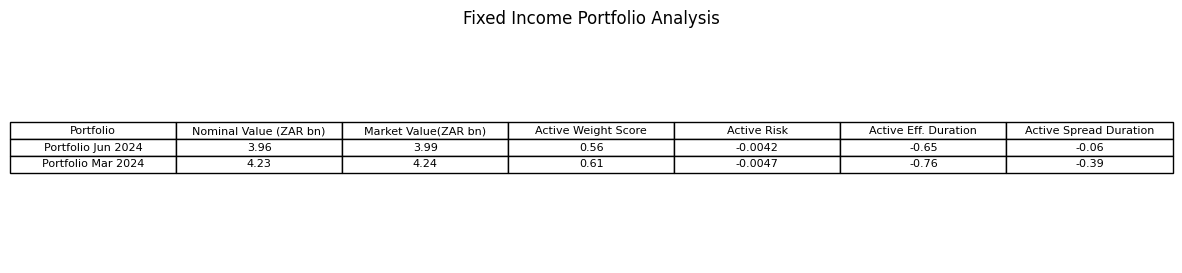

In [306]:
# Function for portfolio analysis
def analyze_fixed_income_portfolio(df, portfolio_name):
    """
    This function takes a DataFrame with fixed income portfolio data and calculates:
    - Portfolio Active Weight Score
    - Portfolio Total Market Value
    - Portfolio Nominal Value
    - Portfolio Active Risk
    - Portfolio Active Effective Duration (MAC)
    - Portfolio Active Spread Duration
    
    Returns a DataFrame with calculated metrics.
    """

    # Ensure necessary columns exist
    required_columns = ["Holdings", "Weight (%)", "Dirty Price", "Price", "Active Total Risk", "Active Effective Duration (MAC)", "Active Spread Duration", "%CR to Active Total Risk", "MC to Active Total Risk", "Active Weight (%)"]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Active Weight Score
    active_wgt_score = sum(abs(df["Active Weight (%)"]))/2
    
    # Portfolio Market Values
    portfolio_market_value = (df["Holdings"] * df["Dirty Price"]).sum()/1000000000

    # Portfolio Nominal Value
    portfolio_nominal_value = (df["Holdings"] * df["Price"]).sum()/1000000000

    # Portfolio Active Risk
    portfolio_active_risk = (df["Active Weight (%)"]*df["MC to Active Total Risk"]).sum()

    # Portfolio Active Effective Duration (MAC)
    portfolio_active_effective_duration = (df["Active Weight (%)"] * df["Active Effective Duration (MAC)"]).sum()

    # Portfolio Active Spread Duration
    portfolio_active_spread_duration = (df["Active Weight (%)"] * df["Active Spread Duration"]).sum()

    # Return data
    return [portfolio_name, 
            f"{portfolio_nominal_value:,.2f}",
            f"{portfolio_market_value:,.2f}", 
            f"{active_wgt_score:,.2f}",
            f"{portfolio_active_risk:,.4f}", 
            f"{portfolio_active_effective_duration:,.2f}", 
            f"{portfolio_active_spread_duration:,.2f}"]

uploaded_data = {
    "Portfolio Jun 2024": df_jun24_filled,
    "Portfolio Mar 2024": df_mar24_filled
}

# Initialize a list to store portfolio results
portfolio_results = []

# Loop through each uploaded DataFrame and analyze
for portfolio_name, df in uploaded_data.items():
    portfolio_results.append(analyze_fixed_income_portfolio(df, portfolio_name))

# Convert results into a DataFrame
columns = ["Portfolio", "Nominal Value (ZAR bn)", "Market Value(ZAR bn)", "Active Weight Score", "Active Risk", "Active Eff. Duration", "Active Spread Duration"]
portfolio_summary_df = pd.DataFrame(portfolio_results, columns=columns)

# Plot the table using Matplotlib
fig, ax = plt.subplots(figsize=(15, len(portfolio_results) * 0.5 + 2))  
ax.axis("tight")
ax.axis("off")

# Create the table
table = ax.table(cellText=portfolio_summary_df.values, 
                 colLabels=portfolio_summary_df.columns, 
                 cellLoc="center", 
                 loc="center")

plt.title("Fixed Income Portfolio Analysis")
plt.show()

The porfolio's nominal and market values decreased from March to June, this may be a result of performance or outflows (or a combonation of both).

The portfolio's active weight score reduced from March to June, suggesting that the portfolio became slightly more aligned with its benchmark.

The portfolio active risk has decreased (become less negative) marginally, however active effective duration and active spread duration have decreased implying less risk in the portfolio (versus the benchmark).

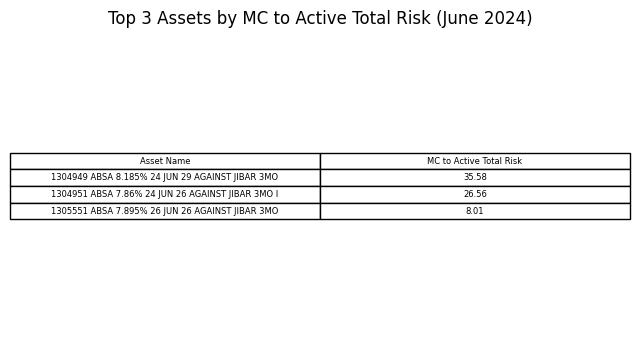

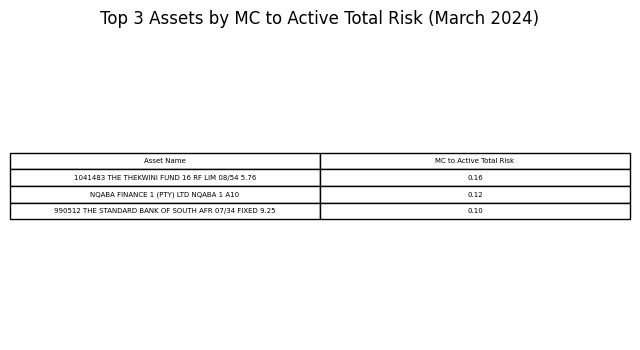

In [307]:
# Function to find the highest MC total acive risk contributors by rank 
def top_assets_by_mc_active_risk(df, top_n=3):
    """
    This function selects the top N assets based on 'MC to Active Total Risk'
    and formats the values to 2 decimal places.
   
    """
    # Ensure the column exists
    if "MC to Active Total Risk" not in df.columns:
        raise ValueError("Column 'MC to Active Total Risk' is missing from the dataset.")
    
    # Select the top assets sorted in descending order
    top_assets = df.nlargest(top_n, "MC to Active Total Risk")[["Asset Name", "MC to Active Total Risk"]]
    
    # Format MC to Active Total Risk to 2 decimal places
    top_assets["MC to Active Total Risk"] = top_assets["MC to Active Total Risk"].apply(lambda x: f"{x:,.2f}")
    
    return top_assets

# Get the top 3 assets for the given DataFrame
top_assets_df_jun24 = top_assets_by_mc_active_risk(df_jun24_filled)

# Plot the top 3 assets using Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("tight")
ax.axis("off")

# Create the table
table = ax.table(cellText=top_assets_df_jun24.values, 
                 colLabels=top_assets_df_jun24.columns, 
                 cellLoc="center", 
                 loc="center")

plt.title("Top 3 Assets by MC to Active Total Risk (June 2024)")
plt.show()

# Get the top 3 assets for the given DataFrame
top_assets_df_mar24 = top_assets_by_mc_active_risk(df_mar24_filled)

# Plot the top 3 assets using Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("tight")
ax.axis("off")

# Create the table
table = ax.table(cellText=top_assets_df_mar24.values, 
                 colLabels=top_assets_df_mar24.columns, 
                 cellLoc="center", 
                 loc="center")

plt.title("Top 3 Assets by MC to Active Total Risk (March 2024)")
plt.show()


Shown in the table above, the highest marginal contributors to marginal contribution to active total risk (MCAR) have changed, therefore it is clear there has been trading in the portfolio. However, more of interest is that the contributors have moved from bonds to money market instruments (these shorter dated instruments would have contributed to the reduction in duration of the portfolio).

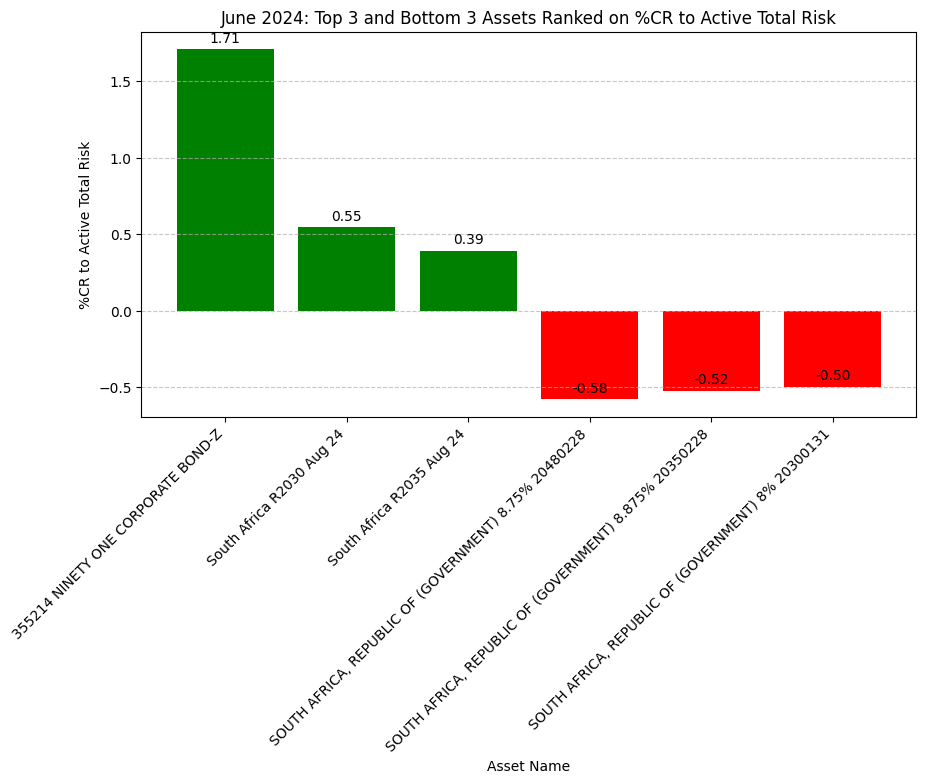

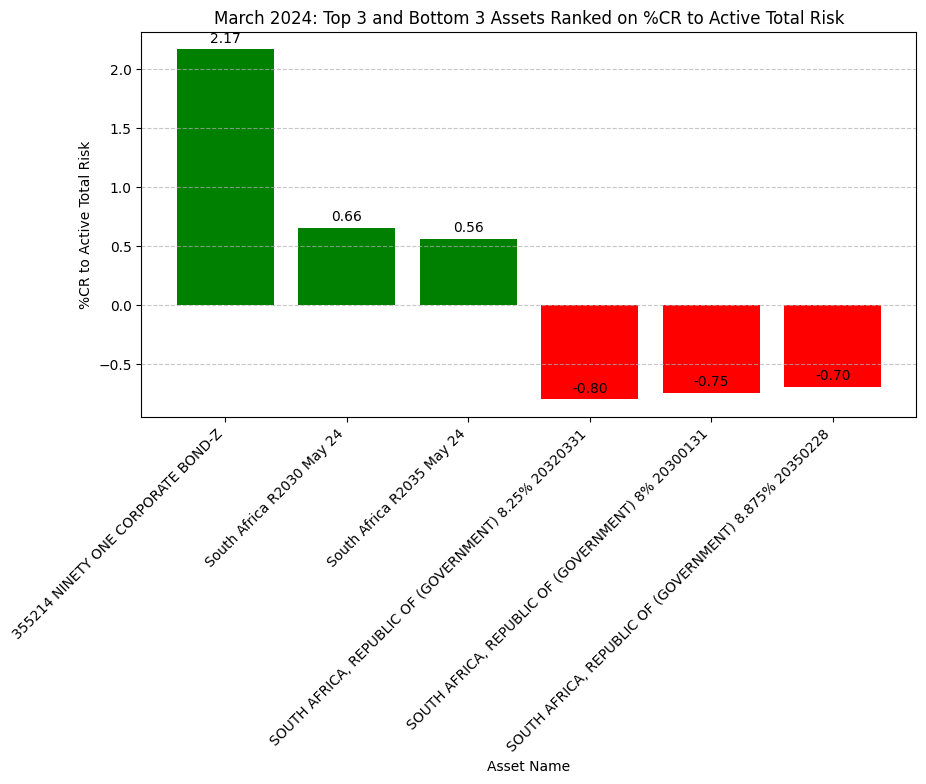

In [308]:
# Define a function to get the top and bottom 3 assets based on %CR to Active Total Risk
def top_bottom_assets_by_cr_active_risk(df, top_n=3):
    """
    This function selects the top and bottom N assets based on '%CR to Active Total Risk'.
    
    """
    
    # Select the top and bottom assets sorted in descending order
    top_assets = df.nlargest(top_n, "%CR to Active Total Risk")[["Asset Name", "%CR to Active Total Risk"]]
    bottom_assets = df.nsmallest(top_n, "%CR to Active Total Risk")[["Asset Name", "%CR to Active Total Risk"]]
    
    # Concatenate results
    combined_assets = pd.concat([top_assets, bottom_assets])
    
    return combined_assets

# Get the top and bottom 3 assets for the given DataFrame
top_bottom_assets_df_jun24 = top_bottom_assets_by_cr_active_risk(df_jun24_filled)

# Extract asset names and values for plotting
asset_names_jun = top_bottom_assets_df_jun24["Asset Name"].values
cr_risk_values_jun = top_bottom_assets_df_jun24["%CR to Active Total Risk"].values

# Create a histogram
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(asset_names_jun, cr_risk_values_jun, color=["green"]*3 + ["red"]*3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Formatting
plt.title("June 2024: Top 3 and Bottom 3 Assets Ranked on %CR to Active Total Risk")
plt.xlabel("Asset Name")
plt.ylabel("%CR to Active Total Risk")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


# Get the top and bottom 3 assets for the given DataFrame
top_bottom_assets_df_mar24 = top_bottom_assets_by_cr_active_risk(df_mar24_filled)

# Extract asset names and values for plotting
asset_names_mar = top_bottom_assets_df_mar24["Asset Name"].values
cr_risk_values_mar = top_bottom_assets_df_mar24["%CR to Active Total Risk"].values

# Create a histogram
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(asset_names_mar, cr_risk_values_mar, color=["green"]*3 + ["red"]*3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Formatting
plt.title("March 2024: Top 3 and Bottom 3 Assets Ranked on %CR to Active Total Risk")
plt.xlabel("Asset Name")
plt.ylabel("%CR to Active Total Risk")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

As shown above, the concentration of the contirbution to risk from a single asset has decreased from March to June. The highest contributor remaing the Ninety One bond fund, while government bonds remain the highest negative contributors. 

Further analysis that can be done:

Risk decomposition using factors i.e. break down the total risk into factor risk (Industry, stile, term structure, spread, geography,selection risk etc.)

### *Risk metrics over time analysis*

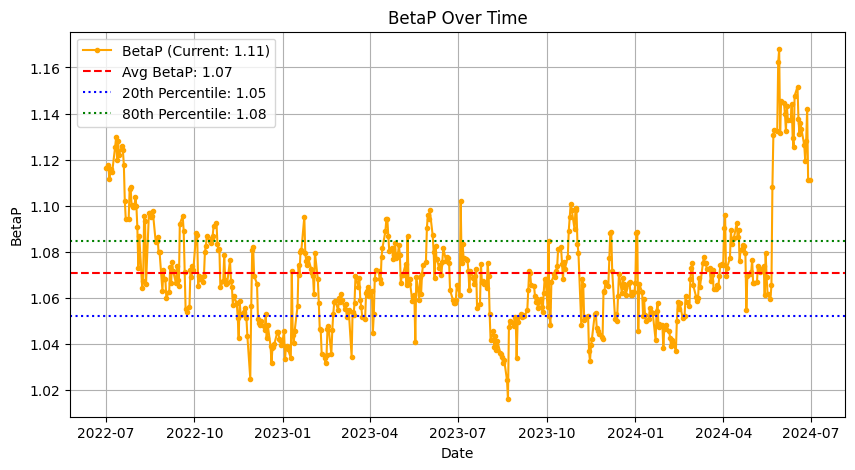

In [309]:
df_rm["ReferenceDate"] = pd.to_datetime(df_rm["ReferenceDate"])

# Function for plotting
def plot_time_series(df_rm, column, title, ylabel, color):
    """
    This function take the time series and plots the data as well as the data's mean, 20th and 80th percentile
    """    
    plt.figure(figsize=(10, 5))

    avg_value = df_rm[column].mean() # average line
    perc_20 = df_rm[column].quantile(0.2)  # 20th percentile
    perc_80 = df_rm[column].quantile(0.8)  # 80th percentile
    latest_value = df_rm[column].iloc[-1]  # Get the most recent value

    plt.plot(df_rm["ReferenceDate"], df_rm[column], marker='o', linestyle='-', markersize=3, label=f"{column} (Current: {latest_value:.2f})", color=color)
    plt.axhline(y=avg_value, color="red", linestyle="--", label=f"Avg {column}: {avg_value:.2f}")
    plt.axhline(y=perc_20, color="blue", linestyle=":", label=f"20th Percentile: {perc_20:.2f}")
    plt.axhline(y=perc_80, color="green", linestyle=":", label=f"80th Percentile: {perc_80:.2f}")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot BetaP Over Time
plot_time_series(df_rm,"BetaP", "BetaP Over Time", "BetaP", "orange")


The beta of the portfolio is significantly higher than its historical average (and 80th percentile), although coming off it's peak this shows the portfolio manager is taking higher risks.

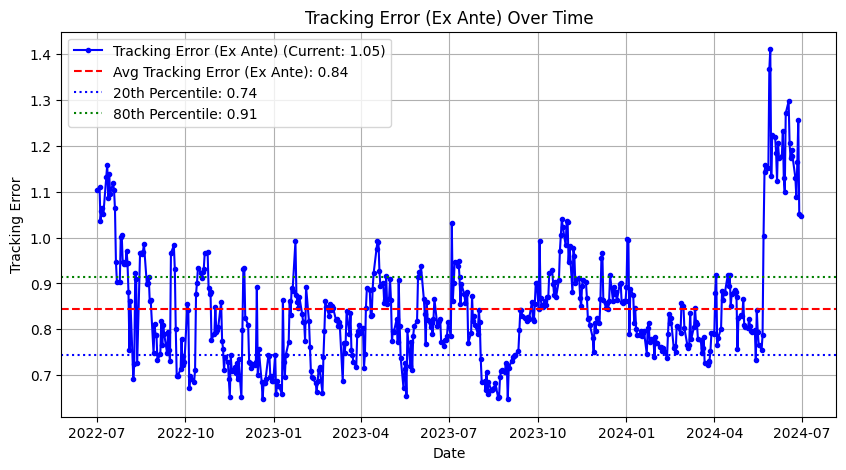

In [310]:
# Plot Tracking Error Over Time
plot_time_series(df_rm, "Tracking Error (Ex Ante)", "Tracking Error (Ex Ante) Over Time", "Tracking Error", "blue")


Similar to the information provided by the beta chart, tracking error is coming off an all time high and is still above its 80th percentile range, confirming that the portfolio is riskier i.e. is deviating further from its benchmark that it has historically. 

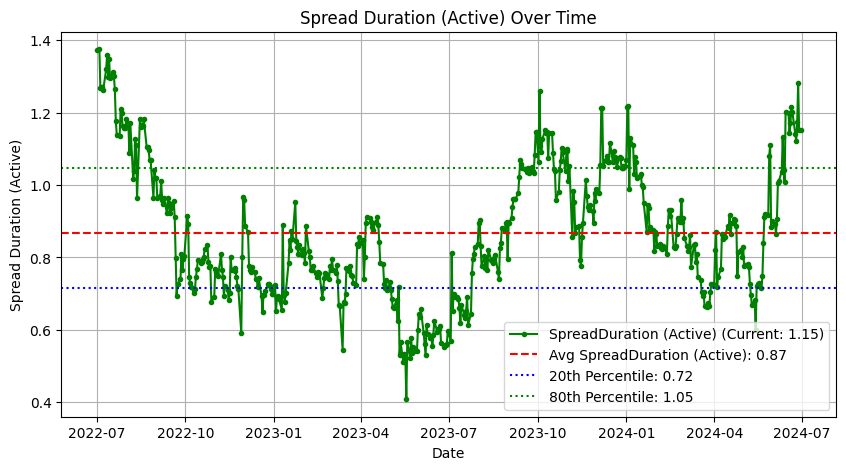

In [311]:
# Plot Spread Duration (Active) Over Time
plot_time_series(df_rm, "SpreadDuration (Active)", "Spread Duration (Active) Over Time", "Spread Duration (Active)", "green")

Active spread duration is close to its historical high, implying that the portfolio is more sensitive (vs the benchmark) to changes in credit spreads than before i.e. riskier portfolio versus its history. This could be due to several reasons:

1. Increase in corporate / higher yield bonds
2. Longer maturity bonds in the portfolio
3. Less liquid bonds added to the portfolio

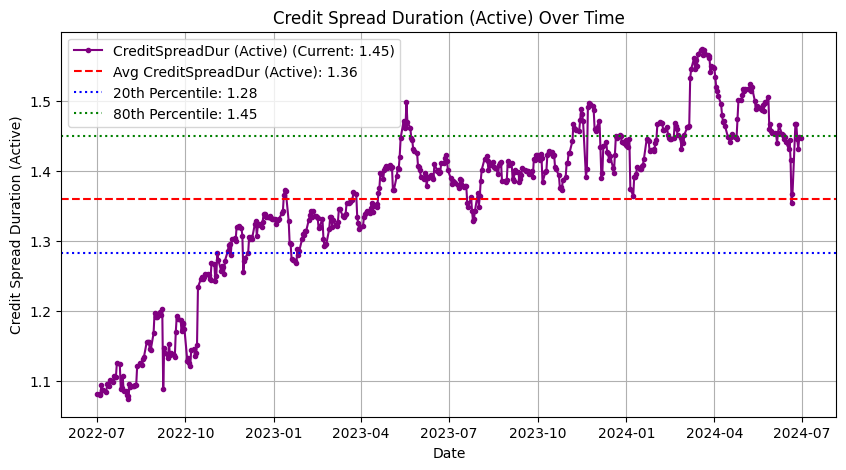

In [312]:

# Plot Credit Spread Duration (Active) Over Time
plot_time_series(df_rm, "CreditSpreadDur (Active)", "Credit Spread Duration (Active) Over Time", "Credit Spread Duration (Active)", "purple")

Active credit spread duration is at the 80th percentile in terms of historic range, implying that the portfolio is more sensitive (vs the benchmark) to changes in credit spreads than before i.e. riskier portfolio versus its history. This suggests that there are more corporate bonds / more extreme positions being held in the portfolio versus the benchmark.